# Introduction: Python, Numpy, Pandas, *et al*.
***


### Computing environment

`watermark` extension allow to track environment.

In [1]:
%load_ext watermark
%watermark -v -p numpy,black,jupyterlab

CPython 3.6.9
IPython 7.8.0

numpy 1.16.5
black not installed
jupyterlab 1.1.3


*Importation des modules nécessaires au TP.*

In [2]:
import math
import sympy
import string

import random
import time

import numpy as np

### Exercice 1

Écrire une fonction `nextpower` qui calcule la première puissance de $2$ supérieure ou égale à un nombre $n$ (on veillera à ce que le type de sortie soit un `int`, tester cela avec `type` par exemple).


In [3]:
def nextpower(n):
    
    result = 1.0
    
    i = 0
    while (result < n):
        result = math.pow(2, i)
        i = i + 1

    return int(result)

# test the function
tab = [1, 2, 3, 4, 5]
for n in tab:
    print("La première puissance de 2 >= {:} est {:} ({:})"
          .format(n, nextpower(n), type(nextpower(n))))


La première puissance de 2 >= 1 est 1 (<class 'int'>)
La première puissance de 2 >= 2 est 2 (<class 'int'>)
La première puissance de 2 >= 3 est 4 (<class 'int'>)
La première puissance de 2 >= 4 est 4 (<class 'int'>)
La première puissance de 2 >= 5 est 8 (<class 'int'>)


### Exercice 2

En partant du mot contenant toutes les lettres de l’alphabet, générer par une opération de *slicing* la chaîne de caractère `cfilorux` et, de deux façons différentes, la chaîne de caractère `vxz`.

In [4]:
# generate alphabet letters (lower case only)
alphabet = string.ascii_letters[0:26]

print("{} ==> {}".format(alphabet, alphabet[2:26:3]))
print("{} ==> {}".format(alphabet, alphabet[21:26:2]))
print("{} ==> {}".format(alphabet, alphabet[-5::2]))

abcdefghijklmnopqrstuvwxyz ==> cfilorux
abcdefghijklmnopqrstuvwxyz ==> vxz
abcdefghijklmnopqrstuvwxyz ==> vxz


### Exercice 3

Afficher le nombre $\pi$ avec 9 décimales après la virgule.

In [5]:
print("le nombre Pi est égal à {:.9f}".format(math.pi))

le nombre Pi est égal à 3.141592654


### Exercice 4

Compter le nombre d’occurrences de chaque caractère dans la chaîne de caractères `s="HelLo WorLd!!"`. On renverra un dictionnaire qui à chaque lettre associe son nombre d’occurrences.

In [6]:
def wordCount(string):
    
    result = {}
    for c in string:
        if c not in result:
            # create (key, value) and set value at 1
            result[c] = 1
        else:
            # increment value
            result[c] += 1
    
    return result

# test
s = "HelLo WorLd!!"

t_start = time.time()

d = wordCount(s)

t_stop = time.time()

print("{} ==> {}".format(s, d))

print("running time = {}".format(t_stop - t_start))

# Use of ipython magic (mini command) to compute time 
%timeit d = wordCount(s) 

HelLo WorLd!! ==> {'H': 1, 'e': 1, 'l': 1, 'L': 2, 'o': 2, ' ': 1, 'W': 1, 'r': 1, 'd': 1, '!': 2}
running time = 0.0
2.51 µs ± 17 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Exercice 5

Écrire une fonction de codage par inversion de lettres: chaque lettre d’un mot est remplacée par une (et une seule) autre. On se servira de la fonction `shuffle` sur la chaîne de caractères contenant tout l’alphabet pour associer les lettres codées.

In [7]:
def cesar_keygen(seed=None):
    '''
    Generates the encryption key.
    '''
    random.seed(seed)
 
    # The keys include letters (upper and lower), digits, punctuations and white space.
    keys = string.ascii_letters + string.digits + string.punctuation + ' ' + '\n'
    alphabet = list(keys)    
    key_list = list(keys)
 
#    alphabet = list(string.printable)    
#    key_list = list(string.printable)

    random.shuffle(key_list)

    encoder = {}
    decoder = {}

    for idx, c in enumerate(alphabet):
        key = key_list[idx]
        encoder[c] = key
        decoder[key] = c

    return (encoder, decoder)

def cesar_encode(encoder, string):
    '''
    Encodes a string.
    '''
    list_in = list(string)
    list_out = []
    
    for c in list_in:
        list_out.append(encoder[c])
    
    return "".join(list_out)

def cesar_decode(decoder, string):
    '''
    Decodes the string.
    '''
    list_in = list(string)
    list_out = []
    
    for c in list_in:
        list_out.append(decoder[c])
    
    return "".join(list_out)

# Test
# Build structures to encode and decode
encoder, decoder = cesar_keygen(seed=3)

s1 = ("Je m'interesse a l'avenir "
      "parce que c'est la que je vais passer le reste de ma vie.")

#s1 = "abcdefghijklmnopqrstuvwxyz"
s2 = cesar_encode(encoder, s1)
s3 = cesar_decode(decoder, s2)

print("original sentence: {:s}".format(s1))
print("coded sentence:    {:s}".format(s2))
print("decoded sentence:  {:s}".format(s3))    

original sentence: Je m'interesse a l'avenir parce que c'est la que je vais passer le reste de ma vie.
coded sentence:    9/.P[m's/"/ZZ/.S.h[Sk/'m".?S"j/.2 /.j[/Zs.hS.2 /.l/.kSmZ.?SZZ/".h/."/Zs/.p/.PS.km/;
decoded sentence:  Je m'interesse a l'avenir parce que c'est la que je vais passer le reste de ma vie.


### Exercice 6

Calculer $\displaystyle{2 \sum_{k=1}^{\infty} \frac{4 k^2}{4 k^2 - 1}}$ efficacement. On pourra utiliser `time` (ou `%timeit`) pour déterminer la rapidité de votre méthode. Proposer une version avec et une version sans boucle (utilisant `Numpy`).

In [8]:
# Compute the running time of the cell
#%%timeit

def product_1(n):
    """
    with loop -- Compute an approximation of pi.
    """
    result = 1.0
    for k in range(1, n + 1):
        k2 = float(k * k)
        tmp = 4. * k2 / (4. * k2 - 1.)
        result *= tmp
        
    return 2.0 * result

def product_2(n):
    """
    with numpy -- Compute an approximation of pi.
    """
    k = np.arange(1, n + 1, dtype=np.float)
    k2 = np.square(k)
    a = 4. * k2 / (4. * k2 - 1.)
    
    return 2.0 * np.prod(a)

# Test
n = 1000000

# Computation with a loop
# =======================
t_start = time.time()

v1 = product_1(n)

t_stop = time.time()

t1 = t_stop - t_start
print("with loop::n = {} => v = {} //// t = {:.6f}".format(n, v1, t1))

# Computation with numpy
# ======================
t_start = time.time()

v2 = product_2(n)

t_stop = time.time()

t2 = t_stop - t_start
print("with numpy::n = {} => v = {} //// t = {:.6f}".format(n, v2, t2))
            

with loop::n = 1000000 => v = 3.141591868192149 //// t = 0.632895
with numpy::n = 1000000 => v = 3.141591868192149 //// t = 0.039575


### Exercice 7

Créer une fonction `quicksort` qui trie une liste, en remplissant les éléments manquants dans le code
suivant. On testera que la fonction est correcte sur l’exemple `quicksort([-2, 3, 5, 1, 3])` :

In [15]:
import copy

def quicksort(ll):
    """ a sorting algorithm with a pivot value"""
    
    if len(ll) <= 1:
        return ll
    else:
        tmp = copy.copy(ll)

        # pivot = last element of the list ll.
        pivot = tmp.pop()
        less = []
        greater = []

        for x in tmp:
            if x <= pivot:
                less.append(x)
            else:
                greater.append(x)

        return quicksort(less) + [pivot] + quicksort(greater)

# Test
l1 = [-2, 3, 5, 1, 3]

l2 = quicksort(l1)

print("{} => {}".format(l1, l2))

[-2, 3, 5, 1, 3] => [-2, 1, 3, 3, 5]


### Exercice 8

Sans utiliser de boucles `for / while` : créer une matrice $\mathbf{M} \in \mathbb{R}^{5 \times 6}$ aléatoire à coefficients uniformes dans $[-1, 1]$, puis remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante. Remplacer enfin les valeurs négatives par 0 en utilisant un masque binaire.

In [16]:
# Control the random generator for repeatability
np.random.seed(4)

# Control the displayed precision
np.set_printoptions(precision=6, floatmode='fixed')

# Generate random matrix
mat = np.random.uniform(-1.0, 1.0, (5, 6))

print("{}\n".format(mat, decimals=3))

# Replace a column every 2
mat[:, ::2] -= 2.0 * mat[:, 1::2]

print("{}\n".format(mat))

# Binary mask - Replace negative value by 0
mat[mat < 0.0] = 0.0

print("{}\n".format(mat))

[[ 0.934060  0.094464  0.945369  0.429632  0.395458 -0.567821]
 [ 0.952549 -0.987539 -0.494035 -0.130417  0.558766 -0.604630]
 [ 0.725986  0.966801 -0.672316  0.194668 -0.982028 -0.226857]
 [-0.911680  0.913306 -0.127707  0.897955  0.572612  0.732579]
 [-0.653669 -0.850103  0.201485 -0.664056  0.466760 -0.183112]]

[[ 0.745131  0.094464  0.086105  0.429632  1.531100 -0.567821]
 [ 2.927628 -0.987539 -0.233201 -0.130417  1.768026 -0.604630]
 [-1.207616  0.966801 -1.061651  0.194668 -0.528313 -0.226857]
 [-2.738292  0.913306 -1.923616  0.897955 -0.892545  0.732579]
 [ 1.046536 -0.850103  1.529597 -0.664056  0.832985 -0.183112]]

[[0.745131 0.094464 0.086105 0.429632 1.531100 0.000000]
 [2.927628 0.000000 0.000000 0.000000 1.768026 0.000000]
 [0.000000 0.966801 0.000000 0.194668 0.000000 0.000000]
 [0.000000 0.913306 0.000000 0.897955 0.000000 0.732579]
 [1.046536 0.000000 1.529597 0.000000 0.832985 0.000000]]



### Exercice 9

Créer une matrice $\mathbf{M} \in \mathbb{R}^{5 \times 20}$ aléatoire à coefficients uniformes dans $[-1, 1]$. Tester que $\mathbf{G} = \mathbf{M}^T \mathbf{M}$ est symétrique et que ses valeurs propres sont positives (on parle de alors de matrice définie positive). Quel est le rang de $\mathbf{G}$ ?


In [17]:
# load method to compute matrix rank of array using SVD method
from numpy.linalg import matrix_rank

# Control the random generator for repeatability
np.random.seed(4)

# Control the displayed precision
np.set_printoptions(precision=2, floatmode='fixed')

# Create random matrix
matrix_M = np.random.uniform(-1.0, 1.0, (5, 20))

# Compute G
matrix_G = np.dot(matrix_M.T, matrix_M)

# The matrix G is symmetric if G = G^T
eps = 1.0e-6

print("G = G.T ? {}".format(np.allclose(matrix_G, matrix_G.T)))
print("G - G.T < eps ? {}".format(np.all(np.fabs(matrix_G - matrix_G.T) < eps)))
print("G = G.T ? {}".format(np.array_equal(matrix_G, matrix_G.T)))

# Computation of the rank of the matrix using numpy.linalg.matrix_rank()
print("The rank of the matrix G is {}.".format(matrix_rank(matrix_G)))

G = G.T ? True
G - G.T < eps ? True
G = G.T ? True
The rank of the matrix G is 5.


# Introduction à Pandas, Matplotlib, etc.
***

On utilise la base de données Individual household electric power consumption Data Set, que l’on pourra télécharger depuis https://bitbucket.org/portierf/shared_files/downloads/household_power_consumption.txt

In [18]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Exercice 10

Charger la base puis détecter et dénombrer le nombre de lignes ayant des valeurs manquantes.

In [19]:
na_values = ['?', '']
columns = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']

# load data file
df = pd.read_csv("household_power_consumption_short.txt", sep=";",
                 na_values=na_values, 
                 usecols=columns,)
#                 low_memory=False)

print(df.dtypes)

all_correct = np.all(pd.notnull(df['Global_active_power']))
print("Are all values correct number? ".format(all_correct))

null_data = df[df.isna().any(axis=1)]
print("taille des données NULL: {}".format(null_data.shape))

print(null_data.head(3))

print("null data {}", null_data.sum())
print("There are " + str(null_data.isna().sum().sum()) + ' total missing values')
print("There are " + str(null_data.shape[0]) + ' lines with missing values')

# rows where there Nan values in one of both columns
n_missing = sum(df['Sub_metering_1'].isna() | df['Global_active_power'].isna())

print("Le nombre de lignes ayant des valeurs manquantes est: {}".format(n_missing))

Date                    object
Time                    object
Global_active_power    float64
Sub_metering_1         float64
dtype: object
Are all values correct number? 
taille des données NULL: (3732, 4)
             Date      Time  Global_active_power  Sub_metering_1
6839   21/12/2006  11:23:00                  NaN             NaN
6840   21/12/2006  11:24:00                  NaN             NaN
19724  30/12/2006  10:08:00                  NaN             NaN
null data {} Date                   21/12/200621/12/200630/12/200630/12/200614/1/2...
Time                   11:23:0011:24:0010:08:0010:09:0018:36:0017:13:...
Global_active_power                                                    0
Sub_metering_1                                                         0
dtype: object
There are 7464 total missing values
There are 3732 lines with missing values
Le nombre de lignes ayant des valeurs manquantes est: 3732


In [ ]:
df.head(5)

In [ ]:
df.describe(include="all")

### Exercice 11

Supprimer toutes les lignes avec des valeurs manquantes.

In [20]:
# remove rows (axis=0) containing missing values
df.dropna(axis=0, inplace=True)

# rows where there Nan values in one of both columns
n_missing = sum(df['Sub_metering_1'].isna() | df['Global_active_power'].isna())

print("Le nombre de lignes ayant des valeurs manquantes est: {}".format(n_missing))

print("la taille des données est: {}".format(df.shape))

Le nombre de lignes ayant des valeurs manquantes est: 0
la taille des données est: (196266, 4)


In [21]:
df.head(5)

,Date,Time,Global_active_power,Sub_metering_1
0,16/12/2006,17:24:00,4.216,0.0
1,16/12/2006,17:25:00,5.360,0.0
2,16/12/2006,17:26:00,5.374,0.0
3,16/12/2006,17:27:00,5.388,0.0
4,16/12/2006,17:28:00,3.666,0.0


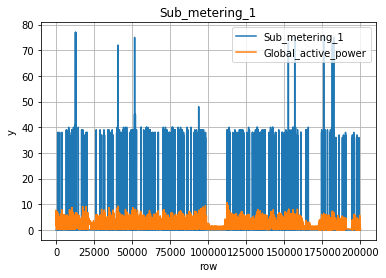

In [22]:
%matplotlib inline

fig = plt.figure()
plt.grid(True)

plt.title("Sub_metering_1")
plt.xlabel("row")
plt.ylabel("y")

plt.plot(df.index, df['Sub_metering_1'], label='Sub_metering_1')
plt.plot(df.index, df['Global_active_power'], label='Global_active_power')

plt.legend(loc='upper right');

plt.show()

### Exercice 12

Modifier la variable `Sub_metering_1` en la multipliant par 0.06.

In [23]:
df['Sub_metering_1'] *= 0.06

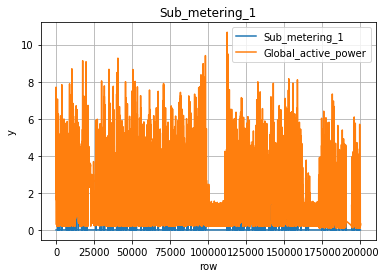

In [24]:
%matplotlib inline

fig = plt.figure()
plt.grid(True)

plt.title("Sub_metering_1")
plt.xlabel("row")
plt.ylabel("y")

plt.plot(df.index, df['Sub_metering_1'], label='Sub_metering_1')
plt.plot(df.index, df['Global_active_power'], label='Global_active_power')

plt.legend(loc='upper right');

plt.show()

### Excercice 13

Utiliser `to_datetime` et `set_index` pour créer un *DataFrame* (on prendra garde au format des dates internationales qui diffère du format français).

In [25]:
df_date =  pd.to_datetime(df['Date'] + ' ' + df['Time'],
                          format="%d/%m/%Y %H:%M:%S",
                          dayfirst=True)

df_date.head()
# use date as index
df.set_index(df_date, inplace=True)

# 'Date' and 'Time' can be removed
df = df.drop(columns=['Date', 'Time'])

df.head(4)

,Global_active_power,Sub_metering_1
2006-12-16 17:24:00,4.216,0.0
2006-12-16 17:25:00,5.360,0.0
2006-12-16 17:26:00,5.374,0.0
2006-12-16 17:27:00,5.388,0.0


### Exercice 14

Afficher le graphique des moyennes journalières entre le 1er janvier et le 30 avril 2007. Proposer une cause expliquant la consommation fin février et début avril. On pourra utiliser en plus de *matplotlib* le package *seaborn* pour améliorer le rendu visuel.

In [26]:
day_first = '01-01-2007'
day_last = '30-04-2007'

df_2007 = df[day_first:day_last]

# Compute the daily average.
# Note assume that index is datetime format.
df_2007_avg = df_2007.resample('D').mean()

df_2007_avg.head(5)

,Global_active_power,Sub_metering_1
2007-01-01,1.909031,0.000000
2007-01-02,0.881414,0.000000
2007-01-03,0.704204,0.000000
2007-01-04,2.263481,0.043792
2007-01-05,1.884281,0.061792


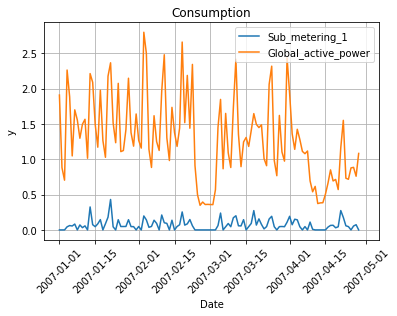

In [28]:
%matplotlib inline

# Register Pandas Formatters and Converters with matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
fig = plt.figure()
plt.grid(True)

plt.title("Consumption")
plt.xlabel("Date")
plt.xticks(rotation=45)

plt.ylabel("y")

plt.plot(df_2007_avg.index, df_2007_avg['Sub_metering_1'], label='Sub_metering_1')
plt.plot(df_2007_avg.index, df_2007_avg['Global_active_power'], label='Global_active_power')

plt.legend(loc='upper right');

plt.show()

On ajoute des informations de température pour cette étude : les données utiles étant disponibles ici https://bitbucket.org/portierf/shared_files/downloads/TG_STAID011249.txt

Ici les températures relevées sont celles d’Orly (noter cependant qu’on ne connaît pas le lieux de relève de la précédente base de données).

### Exercice 15

Charger les données avec *pandas*, et ne garder que les colonnes `DATE` et `TG`. Diviser par 10 la colonne `TG` pour obtenir des températures en degrés Celsius. Traiter les éléments de température aberrants comme des `NaN`.

DATE      int64
TG      float64
dtype: object
['DATE', 'TG']
['Date', 'Temperature']
Date           datetime64[ns]
Temperature           float64
dtype: object


,Temperature
Date,
1921-03-01,5.0
1921-03-02,4.6
1921-03-03,4.6
1921-03-04,3.1
1921-03-05,9.5
1921-03-06,7.2
1921-03-07,5.4
1921-03-08,3.3
1921-03-09,5.0


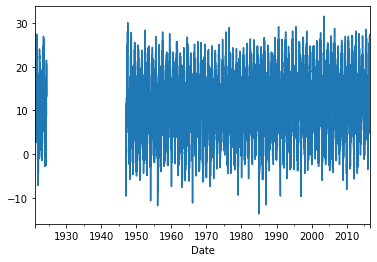

In [29]:
filename = "TG_STAID011249.txt"

# Name of selected columns
columns = ['DATE', 'TG']

# skipinitialspace=True => strip column names
# note that N/A values are coding with values -9999
df2 = pd.read_csv(filename, sep=',', comment='#',
                  usecols=columns,
                  na_values=-9999,
                  skipinitialspace=True)

print(df2.dtypes)

# Rename columns
print(list(df2.columns))
df2 = df2.rename(columns={'DATE':'Date', 'TG':'Temperature'})
print(list(df2.columns))

# Rescale temperature
df2['Temperature'] = df2['Temperature'] / 10.

# format date and set as index
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y%m%d')

print(df2.dtypes)

df2 = df2.set_index(['Date'])

# plot temperature
df2['Temperature'].plot()

df2.head(10)

### Excercice 16

Créer un *DataFrame* pandas des températures journalières entre le 1er janvier et le 30 avril 2007. Afficher sur un même graphique ces températures et la séries `Global_active_power`.

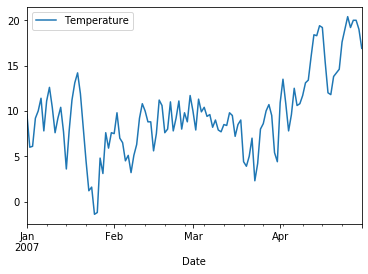

In [30]:
day_first = '01-01-2007'
day_last = '30-04-2007'

df2_2007 = df2[day_first:day_last]

df2_2007.plot()

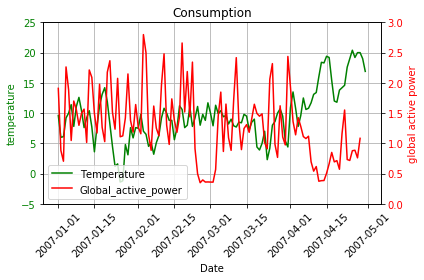

In [47]:
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.grid(True)

plt.title("Consumption")

plt.xlabel("Date")
plt.xticks(rotation=45)

# plot 1
color1 = "green"
ax1.set_ylabel("temperature", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim([-5, 25])
p1, = ax1.plot(df_2007_avg.index, df2_2007['Temperature'],
               label='Temperature',
               color=color1)

# plot 2
# instantiate a second axes that shares the same x-axis
color2 = "red"
ax2 = ax1.twinx()
ax2.set_ylabel("global active power", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

p2, = ax2.plot(df_2007_avg.index, df_2007_avg['Global_active_power'],
               label='Global_active_power',
               color=color2)
ax2.set_ylim([0.0, 3.0])

lns = [p1, p2]
plt.legend(handles=lns, loc='best');

fig.tight_layout() 
plt.show()